In [619]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [620]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Question 1


In [621]:
file_path = '/content/drive/My Drive/Intro to ML/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [622]:
# List of variables to map

varlist =  ['diagnosis']

# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

# Applying the function to the housing list
cancer[varlist] = cancer[varlist].apply(binary_map)



In [623]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [624]:
X = cancer.iloc[:,2:32].values
Y = cancer.iloc[:,1].values

In [625]:
def plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list):
    plt.plot(k_list, acc_list, label = "Accuracy")
    plt.plot(k_list, precision_list, label = "Precision")
    plt.plot(k_list, recall_list, label = "Recall")
    plt.plot(k_list, f1score_list, label = "F1-Score")
    plt.legend()
    plt.title('Plotting classification accuracy, precision, recall and F1-score over a different number of Ks')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

In [626]:
def get_results(y_test, Y_pred):
  acc = metrics.accuracy_score(y_test, Y_pred)
  pre = metrics.precision_score(y_test,Y_pred)
  rec = metrics.recall_score(y_test,Y_pred)
  fscore = metrics.f1_score(y_test,Y_pred)
  print("Accuracy:", metrics.accuracy_score(y_test,Y_pred))
  print("Precision:", metrics.precision_score(y_test,Y_pred))
  print("Recall:", metrics.recall_score(y_test,Y_pred))
  print("F1-Score", metrics.f1_score(y_test,Y_pred))
  return [acc*100.0, pre*100.0, rec*100.0, fscore*100.0]

# Logistical Regression

In [627]:
def logist_model_training_pca(X,Y):
  n=X.shape[1]
  acc_list=[]
  recall_list=[]
  precision_list=[]
  f1score_list=[]
  k_list=[]

  for i in range(n):
    print("K = " +str(i+1))
    pca = PCA(n_components=i+1)
    principalComponents= pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size = 0.20, random_state = 9999)
    classifier = LogisticRegression(random_state=9)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    re = get_results(y_test, Y_pred)
    acc_list.append(re[0])
    precision_list.append(re[1])
    recall_list.append(re[2])
    f1score_list.append(re[3])
    k_list.append(i+1)
  high_acc= max(acc_list)
  high_acc_k = acc_list.index(max(acc_list))+1
  print("---------------")
  print("Highest Classification Accuracy Achieved: " + str(high_acc)+ " for K number = " +str(high_acc_k))
  return k_list, acc_list, precision_list, recall_list, f1score_list


In [628]:
cancer_input = pd.DataFrame(X)

sc_X = StandardScaler()
X = sc_X.fit_transform(cancer_input)

In [629]:
k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,Y)

K = 1
Accuracy: 0.9298245614035088
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1-Score 0.8888888888888888
K = 2
Accuracy: 0.9385964912280702
Precision: 0.9393939393939394
Recall: 0.8611111111111112
F1-Score 0.8985507246376813
K = 3
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score 0.9444444444444444
K = 4
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9722222222222222
F1-Score 0.9859154929577464
K = 5
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score 1.0
K = 6
Accuracy: 0.9912280701754386
Precision: 0.972972972972973
Recall: 1.0
F1-Score 0.9863013698630138
K = 7
Accuracy: 0.9912280701754386
Precision: 0.972972972972973
Recall: 1.0
F1-Score 0.9863013698630138
K = 8
Accuracy: 0.9824561403508771
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1-Score 0.9722222222222222
K = 9
Accuracy: 0.9912280701754386
Precision: 0.972972972972973
Recall: 1.0
F1-Score 0.9863013698630138
K = 10
Accuracy: 0.9824561403508771
Precisi

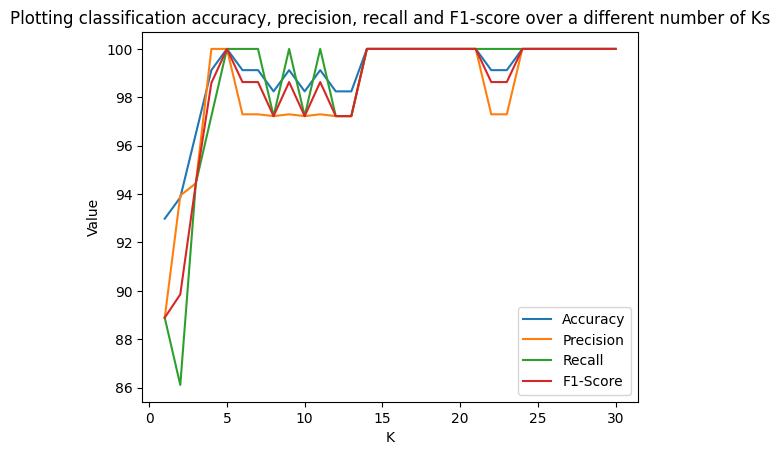

In [630]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

# RBF

In [631]:
def logist_model_training_pca(X,Y):
  n=X.shape[1]
  acc_list=[]
  recall_list=[]
  precision_list=[]
  f1score_list=[]
  k_list=[]

  for i in range(n):
    print("K = " +str(i+1))
    pca = PCA(n_components=i+1)
    principalComponents= pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size = 0.20, random_state = 9999)
    classifier = SVC(kernel = 'rbf', C=1E2)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    re = get_results(y_test, Y_pred)
    acc_list.append(re[0])
    precision_list.append(re[1])
    recall_list.append(re[2])
    f1score_list.append(re[3])
    k_list.append(i+1)
  high_acc= max(acc_list)
  high_acc_k = acc_list.index(max(acc_list))+1
  print("---------------")
  print("Highest Classification Accuracy Achieved: " + str(high_acc)+ " for K number = " +str(high_acc_k))
  return k_list, acc_list, precision_list, recall_list, f1score_list

K = 1
Accuracy: 0.9298245614035088
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1-Score 0.8888888888888888
K = 2
Accuracy: 0.9385964912280702
Precision: 0.9142857142857143
Recall: 0.8888888888888888
F1-Score 0.9014084507042254
K = 3
Accuracy: 0.9385964912280702
Precision: 0.9142857142857143
Recall: 0.8888888888888888
F1-Score 0.9014084507042254
K = 4
Accuracy: 0.956140350877193
Precision: 0.9428571428571428
Recall: 0.9166666666666666
F1-Score 0.9295774647887323
K = 5
Accuracy: 0.956140350877193
Precision: 0.918918918918919
Recall: 0.9444444444444444
F1-Score 0.9315068493150684
K = 6
Accuracy: 0.9736842105263158
Precision: 0.9714285714285714
Recall: 0.9444444444444444
F1-Score 0.9577464788732395
K = 7
Accuracy: 0.956140350877193
Precision: 0.918918918918919
Recall: 0.9444444444444444
F1-Score 0.9315068493150684
K = 8
Accuracy: 0.9385964912280702
Precision: 0.8918918918918919
Recall: 0.9166666666666666
F1-Score 0.9041095890410958
K = 9
Accuracy: 0.9736842105263158
Precision:

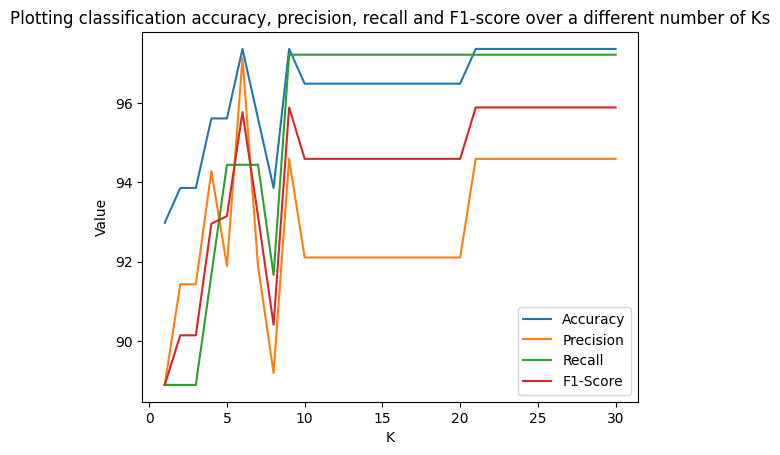

In [632]:
cancer_input = pd.DataFrame(X)

sc_X = StandardScaler()
X = sc_X.fit_transform(cancer_input)

k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,Y)

plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)


#Linear

In [633]:
def logist_model_training_pca(X,Y):
  n=X.shape[1]
  acc_list=[]
  recall_list=[]
  precision_list=[]
  f1score_list=[]
  k_list=[]

  for i in range(n):
    print("K = " +str(i+1))
    pca = PCA(n_components=i+1)
    principalComponents= pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size = 0.20, random_state = 9999)
    classifier = SVC(kernel = 'linear', C=1E2)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    re = get_results(y_test, Y_pred)
    acc_list.append(re[0])
    precision_list.append(re[1])
    recall_list.append(re[2])
    f1score_list.append(re[3])
    k_list.append(i+1)
  high_acc= max(acc_list)
  high_acc_k = acc_list.index(max(acc_list))+1
  print("---------------")
  print("Highest Classification Accuracy Achieved: " + str(high_acc)+ " for K number = " +str(high_acc_k))
  return k_list, acc_list, precision_list, recall_list, f1score_list

K = 1
Accuracy: 0.9298245614035088
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1-Score 0.8888888888888888
K = 2
Accuracy: 0.9385964912280702
Precision: 0.9393939393939394
Recall: 0.8611111111111112
F1-Score 0.8985507246376813
K = 3
Accuracy: 0.956140350877193
Precision: 0.9428571428571428
Recall: 0.9166666666666666
F1-Score 0.9295774647887323
K = 4
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9444444444444444
F1-Score 0.9714285714285714
K = 5
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score 0.9444444444444444
K = 6
Accuracy: 0.9824561403508771
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1-Score 0.9722222222222222
K = 7
Accuracy: 0.9824561403508771
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1-Score 0.9722222222222222
K = 8
Accuracy: 0.9736842105263158
Precision: 0.9459459459459459
Recall: 0.9722222222222222
F1-Score 0.9589041095890412
K = 9
Accuracy: 0.9824561403508771
Precision: 0.97222222

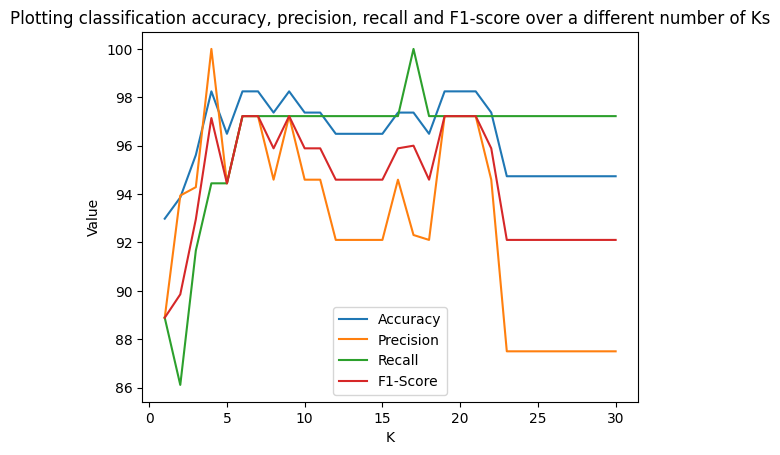

In [634]:

cancer_input = pd.DataFrame(X)

sc_X = StandardScaler()
X = sc_X.fit_transform(cancer_input)

k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,Y)

plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

#Poly

In [635]:
def logist_model_training_pca(X,Y):
  n=X.shape[1]
  acc_list=[]
  recall_list=[]
  precision_list=[]
  f1score_list=[]
  k_list=[]

  for i in range(n):
    print("K = " +str(i+1))
    pca = PCA(n_components=i+1)
    principalComponents= pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size = 0.20, random_state = 9999)
    classifier = SVC(kernel = 'poly', C=1E2)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    re = get_results(y_test, Y_pred)
    acc_list.append(re[0])
    precision_list.append(re[1])
    recall_list.append(re[2])
    f1score_list.append(re[3])
    k_list.append(i+1)
  high_acc= max(acc_list)
  high_acc_k = acc_list.index(max(acc_list))+1
  print("---------------")
  print("Highest Classification Accuracy Achieved: " + str(high_acc)+ " for K number = " +str(high_acc_k))
  return k_list, acc_list, precision_list, recall_list, f1score_list

K = 1
Accuracy: 0.9210526315789473
Precision: 0.9655172413793104
Recall: 0.7777777777777778
F1-Score 0.8615384615384615
K = 2
Accuracy: 0.9298245614035088
Precision: 0.9666666666666667
Recall: 0.8055555555555556
F1-Score 0.8787878787878789
K = 3
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score 0.9444444444444444
K = 4
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9444444444444444
F1-Score 0.9714285714285714
K = 5
Accuracy: 0.9649122807017544
Precision: 0.9705882352941176
Recall: 0.9166666666666666
F1-Score 0.9428571428571428
K = 6
Accuracy: 0.9649122807017544
Precision: 0.9705882352941176
Recall: 0.9166666666666666
F1-Score 0.9428571428571428
K = 7
Accuracy: 0.9473684210526315
Precision: 0.9411764705882353
Recall: 0.8888888888888888
F1-Score 0.9142857142857143
K = 8
Accuracy: 0.9649122807017544
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score 0.9444444444444444
K = 9
Accuracy: 0.9824561403508771
Precision: 0.9722222

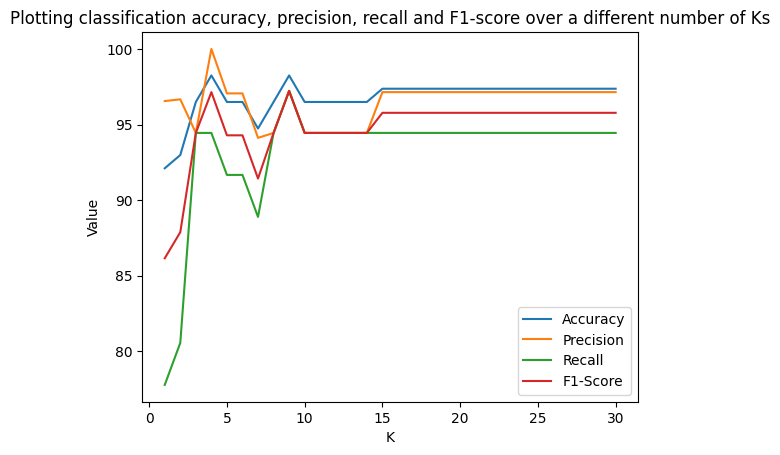

In [636]:
cancer_input = pd.DataFrame(X)

sc_X = StandardScaler()
X = sc_X.fit_transform(cancer_input)

k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,Y)

plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

#Question 2

In [637]:
file_path = '/content/drive/My Drive/Intro to ML/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [638]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)



In [639]:
housing.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [640]:
housing.shape


(545, 13)

In [641]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = housing.loc[:,features].values
Y = housing.loc[:,['price']].values
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

In [642]:
x = X
y = Y

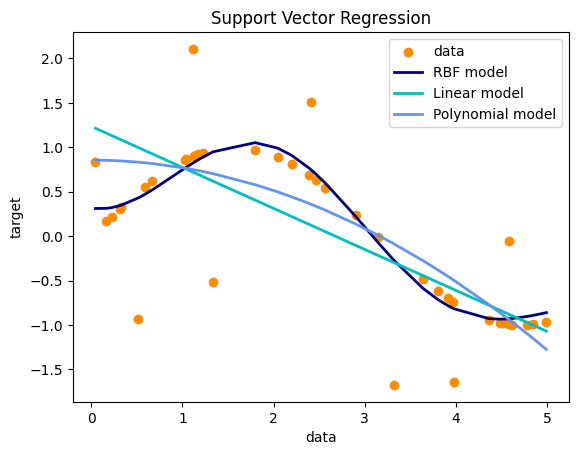

In [643]:
x = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(x).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(x, y).predict(x)
y_lin = svr_lin.fit(x, y).predict(x)
y_poly = svr_poly.fit(x, y).predict(x)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(x, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(x, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

#RBF

In [644]:
def linear_model_training_pca(X, Y):
    n=X.shape[1]
    mse_list = []
    k_list=[]
    for i in range(n):
        print("Current iteration:", i + 1)
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)

        classifier = SVR(kernel = 'rbf', C = 1E2)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        Y_pred_svm = classifier.predict(X_test)
        mse_list.append(mean_squared_error(y_test, Y_pred))
        k_list.append(i+1)

    best_mse = max(mse_list)
    best_k = mse_list.index(best_mse) + 1
    print("----------------")
    print("Highest Accuracy Score Achieved: " + str(best_mse) + " for K number = " + str(best_k))

    return k_list, mse_list

In [645]:

Y =Y.reshape(-1,1)
Yrbf= sc_X.fit_transform(Y)

In [646]:
k_list, mse_scores = linear_model_training_pca(X, Yrbf)

Current iteration: 1
K = 1
Current iteration: 2
K = 2
Current iteration: 3
K = 3
Current iteration: 4
K = 4
Current iteration: 5
K = 5
Current iteration: 6
K = 6
Current iteration: 7
K = 7
Current iteration: 8
K = 8
Current iteration: 9
K = 9
Current iteration: 10
K = 10
Current iteration: 11
K = 11
----------------
Highest Accuracy Score Achieved: 0.6509339205609986 for K number = 5


In [647]:
def plot_result_with_k(k_list,mse_scores):
    plt.plot(k_list, mse_scores, label = "MSE")
    plt.legend()
    plt.title('Plotting  Mean Square Error a different number of Ks')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

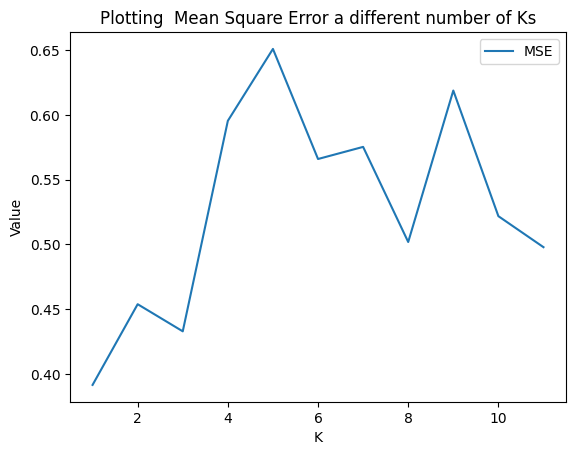

In [648]:

plot_result_with_k(k_list, mse_scores)

#Linear


In [649]:
def linear_model_training_pca(X, Y):
    n=X.shape[1]
    mse_list = []
    k_list=[]
    for i in range(n):
        print("Current iteration:", i + 1)
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)

        classifier = SVR(kernel = 'linear', C = 1E2)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        Y_pred_svm = classifier.predict(X_test)
        mse_list.append(mean_squared_error(y_test, Y_pred))
        k_list.append(i+1)

    best_mse = max(mse_list)
    best_k = mse_list.index(best_mse) + 1
    print("----------------")
    print("Highest Accuracy Score Achieved: " + str(best_mse) + " for K number = " + str(best_k))

    return k_list, mse_list

Current iteration: 1
K = 1
Current iteration: 2
K = 2
Current iteration: 3
K = 3
Current iteration: 4
K = 4
Current iteration: 5
K = 5
Current iteration: 6
K = 6
Current iteration: 7
K = 7
Current iteration: 8
K = 8
Current iteration: 9
K = 9
Current iteration: 10
K = 10
Current iteration: 11
K = 11
----------------
Highest Accuracy Score Achieved: 0.3988180116393801 for K number = 7


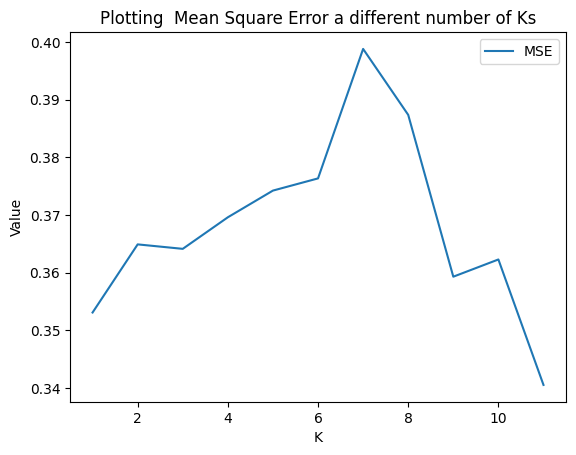

In [650]:
Y =Y.reshape(-1,1)
Ylinear= sc_X.fit_transform(Y)

k_list, mse_scores = linear_model_training_pca(X, Ylinear)

def plot_result_with_k(k_list,mse_scores):
    plt.plot(k_list, mse_scores, label = "MSE")
    plt.legend()
    plt.title('Plotting  Mean Square Error a different number of Ks')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

plot_result_with_k(k_list, mse_scores)

#Poly

In [651]:
def linear_model_training_pca(X, Y):
    n=X.shape[1]
    mse_list = []
    k_list=[]
    for i in range(n):
        print("Current iteration:", i + 1)
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)

        classifier = SVR(kernel = 'poly', C = 1E2)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        Y_pred_svm = classifier.predict(X_test)
        mse_list.append(mean_squared_error(y_test, Y_pred))
        k_list.append(i+1)

    best_mse = max(mse_list)
    best_k = mse_list.index(best_mse) + 1
    print("----------------")
    print("Highest Accuracy Score Achieved: " + str(best_mse) + " for K number = " + str(best_k))

    return k_list, mse_list

Current iteration: 1
K = 1
Current iteration: 2
K = 2
Current iteration: 3
K = 3
Current iteration: 4
K = 4
Current iteration: 5
K = 5
Current iteration: 6
K = 6
Current iteration: 7
K = 7
Current iteration: 8
K = 8
Current iteration: 9
K = 9
Current iteration: 10
K = 10
Current iteration: 11
K = 11
----------------
Highest Accuracy Score Achieved: 13.15694507024866 for K number = 11


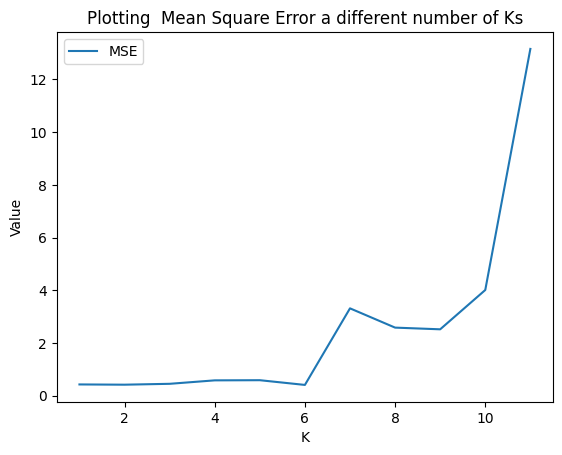

In [652]:
Y =Y.reshape(-1,1)
Ypoly= sc_X.fit_transform(Y)

k_list, mse_scores = linear_model_training_pca(X, Ypoly)

def plot_result_with_k(k_list,mse_scores):
    plt.plot(k_list, mse_scores, label = "MSE")
    plt.legend()
    plt.title('Plotting  Mean Square Error a different number of Ks')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

plot_result_with_k(k_list, mse_scores)